<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/Thedin-Bandara/Arima_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from google.colab import drive



In [ ]:
# Specify the file path
file_path = 'preprocessed_data_new.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())


        Date    Shift   Code          Department Absenteeism Type    Status  \
0 2021-12-01  Shift A  AA369  Team - MAT 4A - BD         Informed  Notified   
1 2021-12-01  Shift A  AA362  Team - MAT 4A - BD         Informed  Notified   
2 2021-12-01  Shift A  AA359  Team - MAT 4A - BD         Informed  Notified   
3 2021-12-01  Shift A  AA541  Team - MAT 4A - BD         Informed  Notified   
4 2021-12-01  Shift A  AA398  Team - MAT 3A - BD         Informed  Notified   

   Leave Type Absent/Present     Reason Joined Date  ...  LeaveMonth  \
0           1            MAT  Maternity  2015-09-11  ...          12   
1           1            MAT  Maternity  2018-11-14  ...          12   
2           1            MAT  Maternity  2019-10-09  ...          12   
3           1            MAT  Maternity  2020-10-02  ...          12   
4           1            MAT  Maternity  2008-02-29  ...          12   

   Encoded Reason  Encoded Status  Encoded Absenteeism Type  Encoded Shift  \
0             

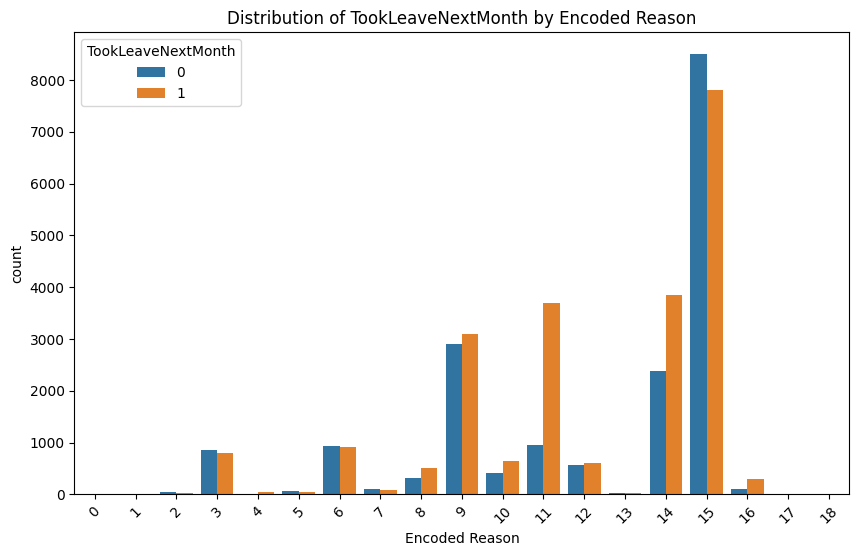

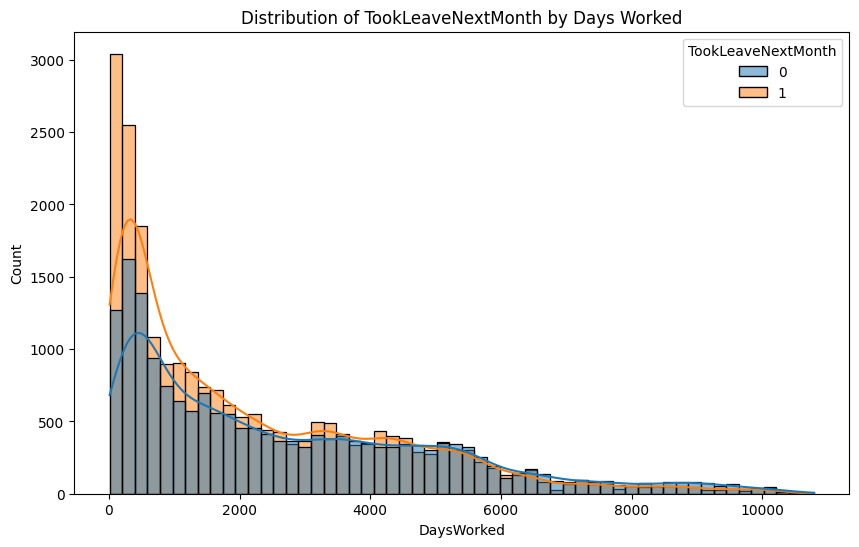

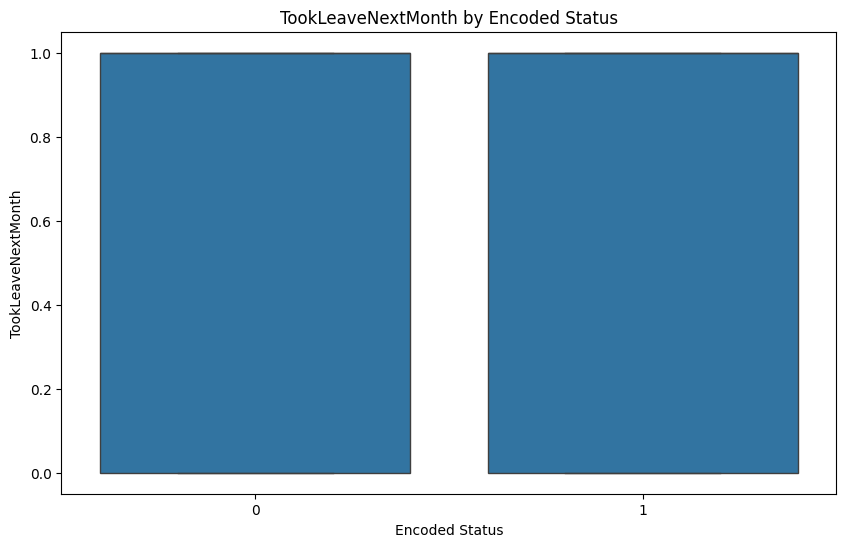

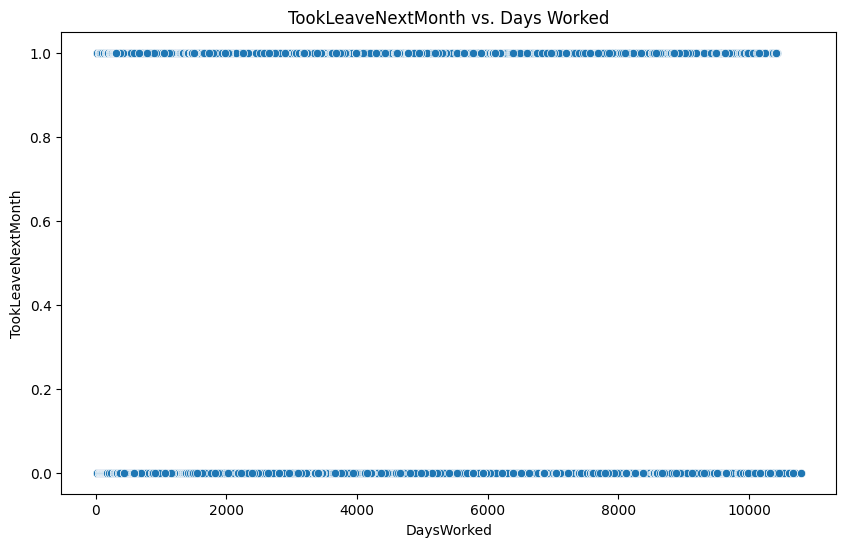

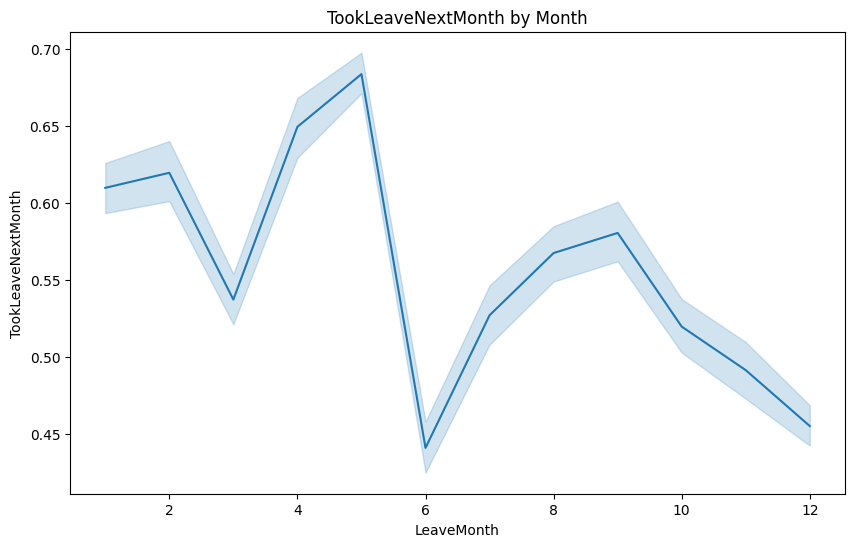

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x='Encoded Reason', hue='TookLeaveNextMonth', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of TookLeaveNextMonth by Encoded Reason')
plt.show()

# Histogram for numerical features
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DaysWorked', hue='TookLeaveNextMonth', kde=True)
plt.title('Distribution of TookLeaveNextMonth by Days Worked')
plt.show()

# Box plot for comparing categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Encoded Status', y='TookLeaveNextMonth', data=df)
plt.title('TookLeaveNextMonth by Encoded Status')
plt.show()

# Scatter plot for relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DaysWorked', y='TookLeaveNextMonth', data=df)
plt.title('TookLeaveNextMonth vs. Days Worked')
plt.show()

# Line plot for time series (e.g., month)
plt.figure(figsize=(10, 6))
sns.lineplot(x='LeaveMonth', y='TookLeaveNextMonth', data=df)
plt.title('TookLeaveNextMonth by Month')
plt.show()


In [ ]:
# Create time series features
def create_time_series_features(df):
    """
    Create time series features based on 'Date' column.
    """
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.isocalendar().week
    return df

# Apply function to create time series features
train = create_time_series_features(train)
test = create_time_series_features(test)

# Define features and target variables for training and testing
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]
